In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is
# an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans.

(300, 2)


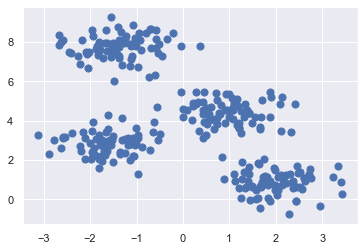

In [15]:
# unsupervised machine learning models: clustering algorithms.

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
# The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
# Each point is closer to its own cluster center than to other cluster centers.
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], s=50);


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)#n_clusters - no of clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

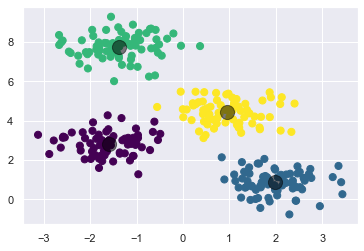

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Another dataset example

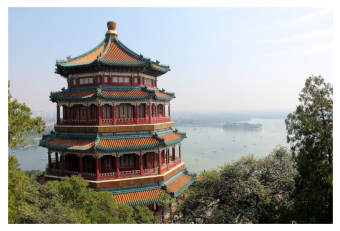

In [20]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])# without xsticks and Yticks image shows the gridlines
ax.imshow(china); #image show with the help of matplotlib

In [21]:
china.shape

(427, 640, 3)

In [23]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

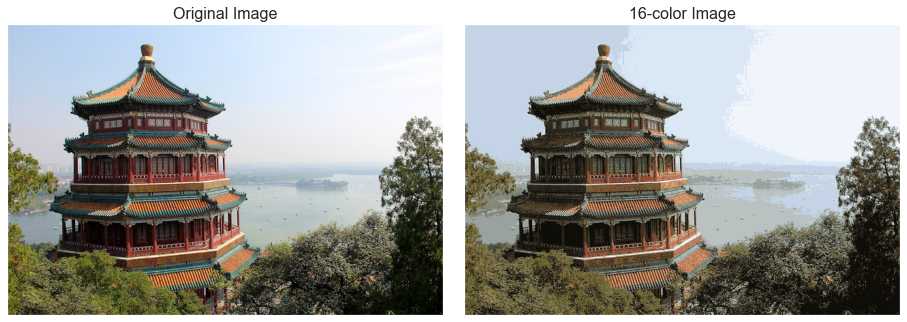

In [53]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)# space between images
# there are two subplots ax[0] and ax[1]
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [46]:
# We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:



def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

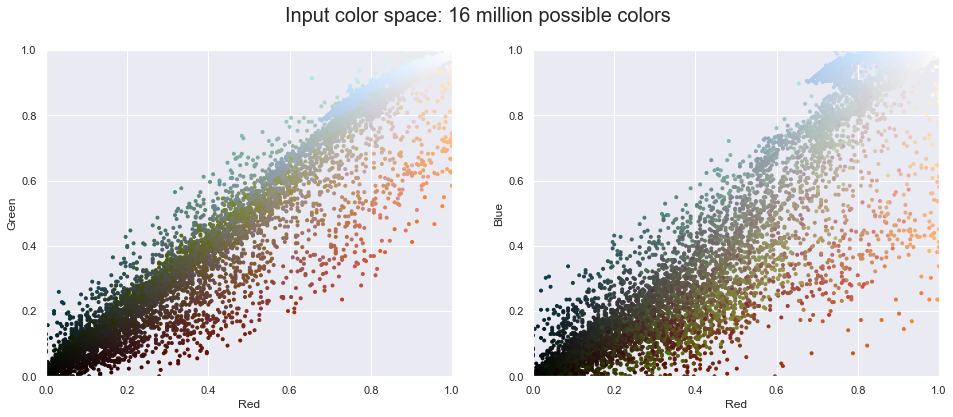

In [47]:
plot_pixels(data, title='Input color space: 16 million possible colors')


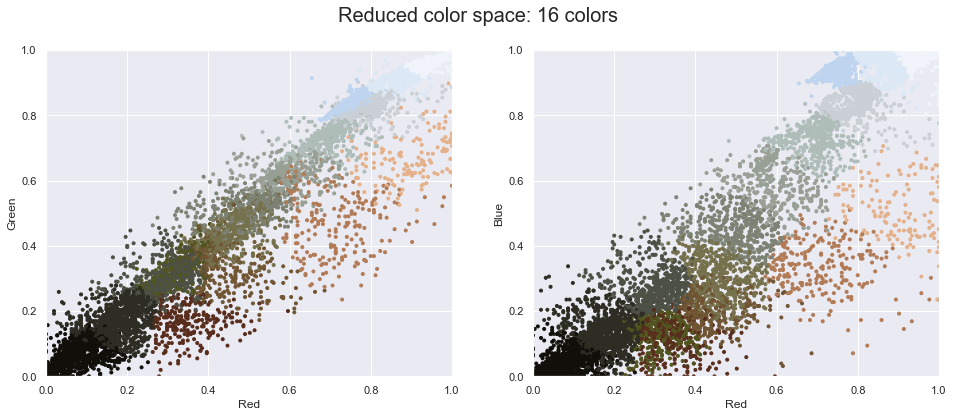

In [54]:
# Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across 
# the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, 
# which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:





import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")
